<a href="https://colab.research.google.com/github/maddiejane25/Project-1/blob/dev/Alzheimers_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARIES**

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# **IMPORT AND READ DATA**

In [3]:
# Upload the csv file
from google.colab import files
uploaded = files.upload()

Saving alzheimers_disease_data.csv to alzheimers_disease_data.csv


In [4]:
# Import the csv file
alzheimer_df = pd.read_csv('alzheimers_disease_data.csv')
alzheimer_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [5]:
# Get info
alzheimer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [6]:
# Search for missing or duplicate data
print('Null:', alzheimer_df.isnull().sum().sum())
print('Duplicate:', alzheimer_df.duplicated().sum())

Null: 0
Duplicate: 0


# **EXPLORATORY DATA ANALYSIS**

In [7]:
# Drop columns?
alzheimer_df.drop((['DoctorInCharge', 'MMSE', 'FunctionalAssessment', 'ADL']), axis = 1, inplace = True)

In [10]:
# Change Binary Columns from 0/1 to No/Yes
alzheimer_df_yesno = alzheimer_df.copy()
alzheimer_df_yesno[['Smoking', 'FamilyHistoryAlzheimers',
                                   'CardiovascularDisease', 'Diabetes',
                                   'Depression', 'HeadInjury', 'Hypertension',
                                   'MemoryComplaints', 'BehavioralProblems',
                                   'Confusion', 'Disorientation', 'PersonalityChanges',
                                   'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']] = alzheimer_df[['Smoking', 'FamilyHistoryAlzheimers',
                                   'CardiovascularDisease', 'Diabetes',
                                   'Depression', 'HeadInjury', 'Hypertension',
                                   'MemoryComplaints', 'BehavioralProblems',
                                   'Confusion', 'Disorientation', 'PersonalityChanges',
                                   'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']].replace({0: 'No', 1: 'Yes'})

# Change Gender column
alzheimer_df_yesno['Gender'] = alzheimer_df['Gender'].replace({0: 'Male', 1: 'Female'})

# Change Ethnicity column
alzheimer_df_yesno['Ethnicity'] = alzheimer_df['Ethnicity'].replace({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'})

# Change EducationLevel column
alzheimer_df_yesno['EducationLevel'] = alzheimer_df['EducationLevel'].replace({0: 'None', 1: 'High School', 2: 'Bachelors', 3: 'Higher'})

# Display Changes
alzheimer_df_yesno.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,CholesterolHDL,CholesterolTriglycerides,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,Male,Caucasian,Bachelors,22.927749,No,13.297218,6.327112,1.347214,...,33.682563,162.189143,No,No,No,No,No,Yes,No,No
1,4752,89,Male,Caucasian,None,26.827681,No,4.542524,7.619885,0.518767,...,79.028477,294.630909,No,No,No,No,No,No,Yes,No
2,4753,73,Male,Other,High School,17.795882,No,19.555085,7.844988,1.826335,...,69.772292,83.638324,No,No,No,Yes,No,Yes,No,No
3,4754,74,Female,Caucasian,High School,33.800817,Yes,12.209266,8.428001,7.435604,...,68.457491,277.577358,No,Yes,No,No,No,No,No,No
4,4755,89,Male,Caucasian,None,20.716974,No,18.454356,6.310461,0.795498,...,56.874305,291.198780,No,No,No,No,Yes,Yes,No,No
5,4756,86,Female,African American,High School,30.626886,No,4.140144,0.211062,1.584922,...,79.080503,263.943655,No,No,Yes,No,No,No,No,No
6,4757,68,Male,Other,Bachelors,38.387622,Yes,0.646047,9.257695,5.897388,...,66.533369,216.489175,No,No,No,No,No,No,Yes,No
7,4758,75,Male,Caucasian,High School,18.776009,No,13.723826,4.649451,8.341903,...,77.346816,210.570866,No,No,Yes,No,No,No,Yes,Yes
8,4759,72,Female,African American,None,27.833188,No,12.167848,1.531360,6.736882,...,43.075893,151.164186,No,Yes,No,No,Yes,No,No,No
9,4760,87,Male,Caucasian,None,35.456302,Yes,16.028688,6.440773,8.086019,...,74.291247,144.175975,No,Yes,No,No,No,No,No,No


In [11]:
# How many individuals from the data set have been diagnosed with Alzheimers?
print("Individuals in the dataset who were diagnosed with Alzheimer\'s:", alzheimer_df_yesno[alzheimer_df_yesno['Diagnosis'] == 'Yes'].shape[0])

Individuals in the dataset who were diagnosed with Alzheimer's: 760


# **DEMOGRAPHICS**
* Age
* Gender
* Ethnicity
* Education Level





In [13]:
# Make a smaller dataset for Demographics
demographics = alzheimer_df_yesno[['Diagnosis','Age', 'Gender', 'Ethnicity', 'EducationLevel']]
demographics.head()

,Diagnosis,Age,Gender,Ethnicity,EducationLevel
0,No,73,Male,Caucasian,Bachelors
1,No,89,Male,Caucasian,None
2,No,73,Male,Other,High School
3,No,74,Female,Caucasian,High School
4,No,89,Male,Caucasian,None


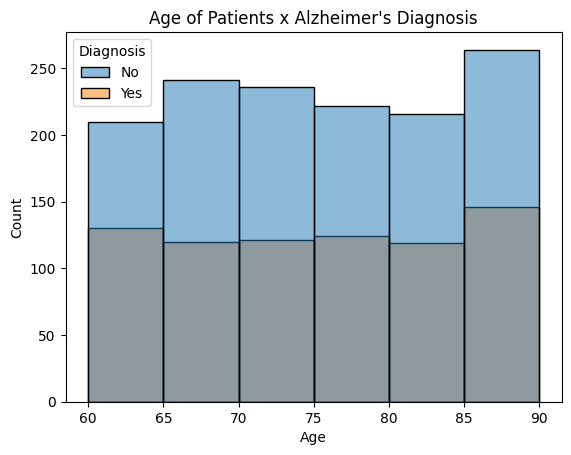

In [14]:
# Age Distribution by Diagnosis
sns.histplot(data=alzheimer_df_yesno, x='Age', hue='Diagnosis', binwidth=5)
plt.title('Age of Patients x Alzheimer\'s Diagnosis')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()


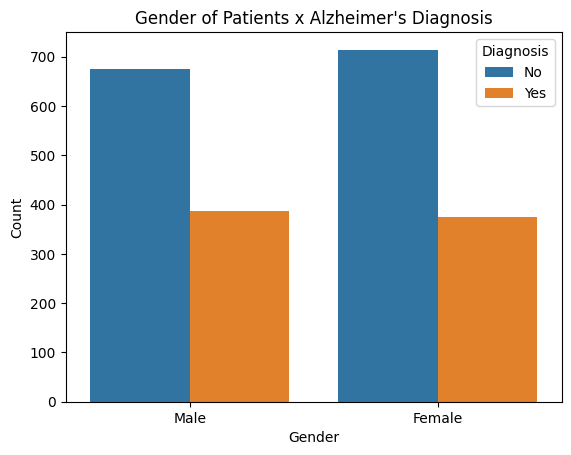

In [15]:
# Gender Distribution by Diagnosis
sns.countplot(data=alzheimer_df_yesno, x='Gender', hue='Diagnosis')
plt.title('Gender of Patients x Alzheimer\'s Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

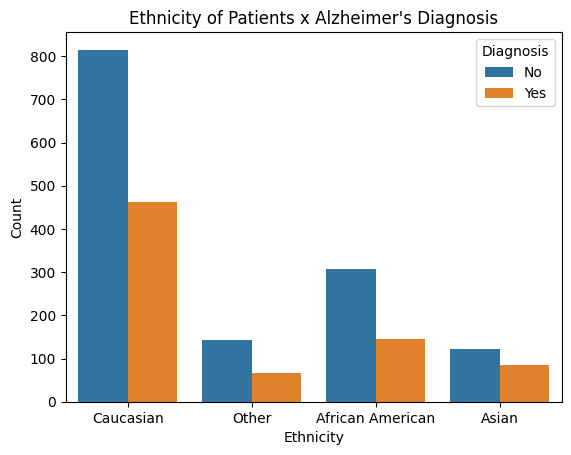

In [16]:
# Ethnicity Distribution by Diagnosis
sns.countplot(data=alzheimer_df_yesno, x='Ethnicity', hue='Diagnosis')
plt.title('Ethnicity of Patients x Alzheimer\'s Diagnosis')
plt.xlabel('Ethnicity')
plt.ylabel('Count')

# Display the plot
plt.show()

# **LIFESTYLE**
* BMI
* Smoking
* Alcohol Consumption
* Pyhsical Activity
* Diet Quality
* Sleep Quality

# **MEDICAL HISTORY**
* Family History Alzheimers
* Cardiovascular Disease
* Diabetes
* Depression
* Head Injury
* Hypertension

In [17]:
# Make a smaller dataset for medical_history
medical_history = alzheimer_df_yesno[['Diagnosis',
                                'FamilyHistoryAlzheimers',
                                'CardiovascularDisease',
                                'Diabetes',
                                'Depression',
                                'HeadInjury',
                                'Hypertension']]
medical_history.head()

,Diagnosis,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension
0,No,No,No,Yes,Yes,No,No
1,No,No,No,No,No,No,No
2,No,Yes,No,No,No,No,No
3,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No


Text(0, 0.5, 'Count')

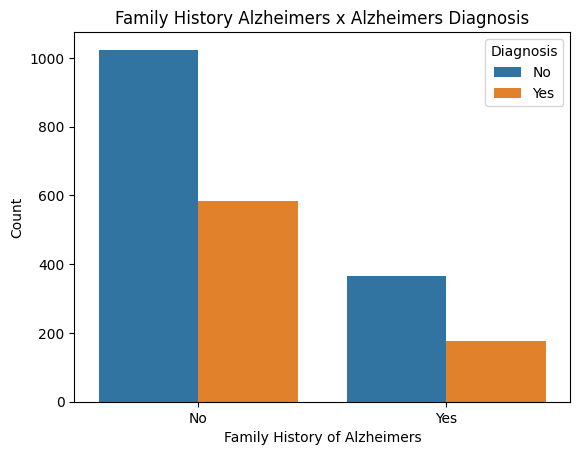

In [18]:
# Plot a countplot of Family History vs Diagnosis
sns.countplot(x='FamilyHistoryAlzheimers', hue='Diagnosis', data=medical_history)
plt.title('Family History Alzheimers x Alzheimers Diagnosis')
plt.xlabel('Family History of Alzheimers')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

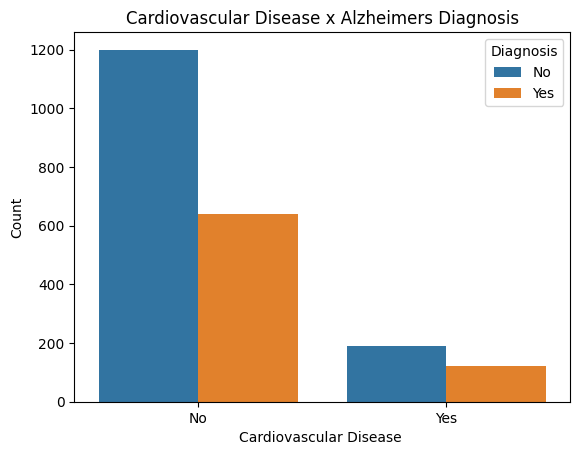

In [19]:
# Plot a countplot of Cardiovascular Disease vs Diagnosis

sns.countplot(x='CardiovascularDisease', hue='Diagnosis', data=medical_history)
plt.title('Cardiovascular Disease x Alzheimers Diagnosis')
plt.xlabel('Cardiovascular Disease ')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

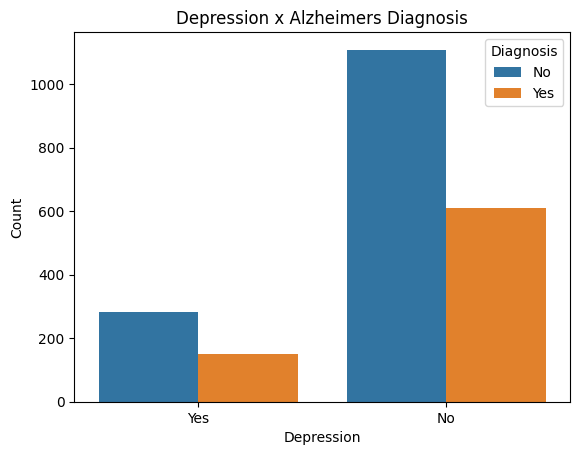

In [20]:
# Plot a countplot of Depression vs Diagnosis

sns.countplot(x='Depression', hue='Diagnosis', data=medical_history)
plt.title('Depression x Alzheimers Diagnosis')
plt.xlabel('Depression')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

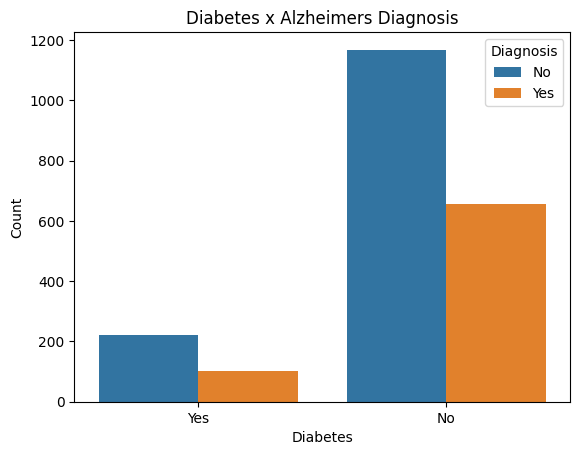

In [21]:
# Plot a countplot of Diabetes vs Diagnosis

sns.countplot(x='Diabetes', hue='Diagnosis', data=medical_history)
plt.title('Diabetes x Alzheimers Diagnosis')
plt.xlabel('Diabetes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

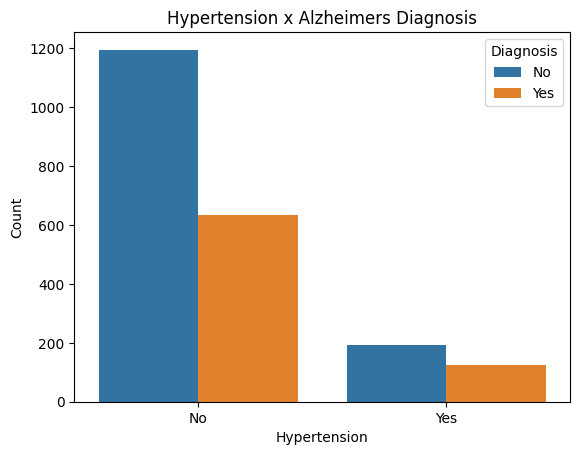

In [22]:
# Plot a countplot of Hypertension vs Diagnosis

sns.countplot(x='Hypertension', hue='Diagnosis', data=medical_history)
plt.title('Hypertension x Alzheimers Diagnosis')
plt.xlabel('Hypertension')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

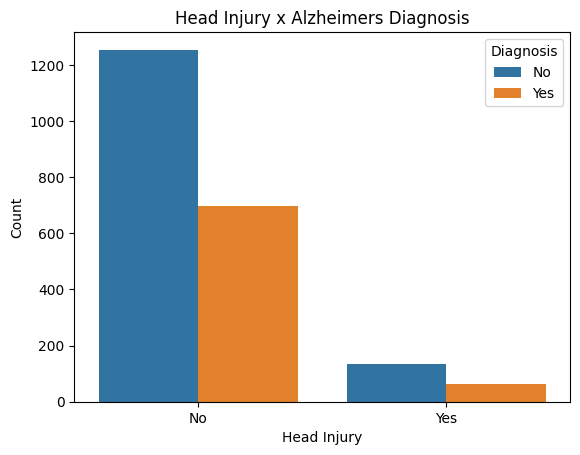

In [23]:
# Plot a countplot of Head Injury vs Diagnosis


sns.countplot(x='HeadInjury', hue='Diagnosis', data=medical_history)
plt.title('Head Injury x Alzheimers Diagnosis')
plt.xlabel('Head Injury')
plt.ylabel('Count')

# **CLINICAL MEASUREMENTS**
* Systolic BP
* Diastolic BP
* Cholesterol Total
* Cholesterol LDL
* Cholesterol HDL
* Cholesterol Triglycerides


In [24]:
#Create a Clinical Measurement dataframe
clinical_measurements = alzheimer_df[['SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides','Diagnosis']]
clinical_measurements

,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,Diagnosis
0,142,72,242.366840,56.150897,33.682563,162.189143,0
1,115,64,231.162595,193.407996,79.028477,294.630909,0
2,99,116,284.181858,153.322762,69.772292,83.638324,0
3,118,115,159.582240,65.366637,68.457491,277.577358,0
4,94,117,237.602184,92.869700,56.874305,291.198780,0
...,...,...,...,...,...,...,...
2144,122,101,280.476824,94.870490,60.943092,234.520123,1
2145,152,106,186.384436,95.410700,93.649735,367.986877,1
2146,115,118,237.024558,156.267294,99.678209,294.802338,1
2147,103,96,242.197192,52.482961,81.281111,145.253746,1


In [25]:
#Check if Blood Pressure is appropriate value, if not, drop the value
def check_and_drop(SystolicBP, DiastolicBP):
    if DiastolicBP > SystolicBP:
        return None, None
    else:
        return SystolicBP, DiastolicBP

In [26]:
#Apply the check_and_drop function to the BP columns

clinical_measurements['SystolicBP'], clinical_measurements['DiastolicBP'] = zip(*clinical_measurements.apply(lambda row: check_and_drop(row['SystolicBP'], row['DiastolicBP']), axis=1))
clinical_measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SystolicBP                1973 non-null   float64
 1   DiastolicBP               1973 non-null   float64
 2   CholesterolTotal          2149 non-null   float64
 3   CholesterolLDL            2149 non-null   float64
 4   CholesterolHDL            2149 non-null   float64
 5   CholesterolTriglycerides  2149 non-null   float64
 6   Diagnosis                 2149 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 117.6 KB


<ipython-input-26-de858906e845>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_measurements['SystolicBP'], clinical_measurements['DiastolicBP'] = zip(*clinical_measurements.apply(lambda row: check_and_drop(row['SystolicBP'], row['DiastolicBP']), axis=1))


In [27]:
display(clinical_measurements['SystolicBP'].describe())
display(clinical_measurements['DiastolicBP'].describe())

,SystolicBP
count,1973.000000
mean,137.436898
std,24.626823
min,90.000000
25%,117.000000
50%,138.000000
75%,158.000000
max,179.000000


,DiastolicBP
count,1973.000000
mean,88.028383
std,17.097537
min,60.000000
25%,73.000000
50%,88.000000
75%,103.000000
max,119.000000


In [28]:
# Plot the Systolic Blood Pressure findings on a box plot with diagnosis
alt.Chart(clinical_measurements).mark_boxplot().encode(
    x='Diagnosis:N',
    y='SystolicBP:Q'
)

alt.Chart(...)

In [29]:
# Plot the Diastolic Blood Pressure findings on a box plot with diagnosis
alt.Chart(clinical_measurements).mark_boxplot().encode(
    x='Diagnosis:N',
    y='DiastolicBP:Q')

alt.Chart(...)

In [30]:
# Make a box plot that compares cholesterol total to diagnosis

alt.Chart(clinical_measurements).mark_boxplot().encode(
    x='Diagnosis:N',
    y='CholesterolTotal:Q'
)

alt.Chart(...)

In [31]:
display(clinical_measurements['CholesterolHDL'].describe())
display(clinical_measurements['CholesterolLDL'].describe())
display(clinical_measurements['CholesterolTriglycerides'].describe())
display(clinical_measurements['CholesterolTotal'].describe())

,CholesterolHDL
count,2149.000000
mean,59.463533
std,23.139174
min,20.003434
25%,39.095698
50%,59.768237
75%,78.939050
max,99.980324


,CholesterolLDL
count,2149.000000
mean,124.335944
std,43.366584
min,50.230707
25%,87.195798
50%,123.342593
75%,161.733733
max,199.965665


,CholesterolTriglycerides
count,2149.000000
mean,228.281496
std,101.986721
min,50.407194
25%,137.583222
50%,230.301983
75%,314.839046
max,399.941862


,CholesterolTotal
count,2149.000000
mean,225.197519
std,42.542233
min,150.093316
25%,190.252963
50%,225.086430
75%,262.031657
max,299.993352


In [32]:
# Make a box plot that compares cholesterolLDL to diagnosis

alt.Chart(clinical_measurements).mark_boxplot().encode(
    x='Diagnosis:N',
    y='CholesterolLDL:Q',)

alt.Chart(...)

In [33]:
# Make a box plot that compares cholesterolHDL to diagnosis

alt.Chart(clinical_measurements).mark_boxplot().encode(
    x='Diagnosis:N',
    y='CholesterolHDL:Q'
)

alt.Chart(...)

In [34]:
 #Make a box plot that compares cholesteroltriglicerides to diagnosis

alt.Chart(clinical_measurements).mark_boxplot().encode(
    x='Diagnosis:N',
    y='CholesterolTriglycerides:Q'
)

alt.Chart(...)

# **SYMPTOMS**
* Confusion
* Disorientation
* Personality Changes
* Difficulty Completing Tasks
* Forgetfulness
* Memory Complaints
* Behavioral Problems


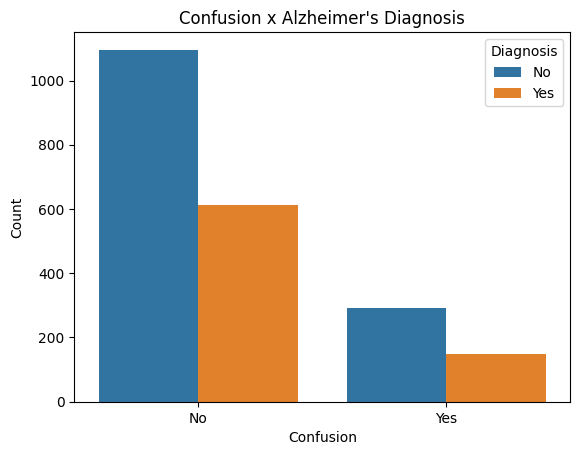

In [ ]:
# Gender Distribution by Diagnosis
sns.countplot(data=alzheimer_df, x='Confusion', hue='Diagnosis')
plt.title('Confusion x Alzheimer\'s Diagnosis')
plt.xlabel('Confusion')
plt.ylabel('Count')

# Display the plot
plt.show()